# CM3015 - Machine Learning and Neural Networks Final Coursework

## Introduction to Dataset of Choice

Sign Language MNIST dataset - https://www.kaggle.com/datamunge/sign-language-mnist

The Sign Language MNIST dataset is very similar to the original MNIST image dataset which is often used as the standard for image-based machine learning methods. This dataset allow us to take up a more challenging and real world application of deep learning by using computer vision data to recognise sign languages.

The images in this dataset is expanded from the original 1704 colored images of hand gestures by using various image pipeline which includes cropping, gray scaling, resizing and recreation of 50+ variations to enlarge the quantity to 34,627 data cases (train + test set).

Universal Workflow of Machine Learning DLWP_4.5 consists of the following steps:
#### 1) Defining the problem and assembling a dataset
#### 2) Choosing a measure of success
#### 3) Deciding on an evaluation protocol
#### 4) Preparing your data
#### 5) Developing a model that does better than a baseline
#### 6) Scaling up: developing a model that overfits
#### 7) Regularizing your model and tuning your hyperparameters

In this notebook, we will be processing and explaining what is done to the dataset through each of these steps

## Importing all libraries used in this notebook

In [1]:
import numpy as np
import pandas as pd
import tensorflow as tf

## Defining the problem and assembling a dataset

#### What will the input data be? What are we trying to predict?

In [2]:
train_set = pd.read_csv('sign_mnist_train.csv')
test_set = pd.read_csv('sign_mnist_test.csv')
print(f"length of training set: {len(train_set)}")
print(f"length of training set: {len(test_set)}")
train_set[0:1]

length of training set: 27455
length of training set: 7172


label  pixel1  pixel2  pixel3  pixel4  pixel5  pixel6  pixel7  pixel8  \
0      3     107     118     127     134     139     143     146     150   

   pixel9  ...  pixel775  pixel776  pixel777  pixel778  pixel779  pixel780  \
0     153  ...       207       207       207       207       206       206   

   pixel781  pixel782  pixel783  pixel784  
0       206       204       203       202  

[1 rows x 785 columns]

This dataset consists of 27,455 and 7,172 data records for the training and testing set respectively. Each data record consists of 785 columns where the first column is represented by the label, while the remaining 784 represents each pixel of the 28 by 28 pixel image of a hand gesture.


What we will be trying to predict with this dataset is which label does each of the hand gesture images in the test set belong to.

This is a multiclass classification problem as each label can be classified into 24 different labels, represented by 0 to 23 in a one-to-one map to each of the alphabetic letters from A to Y excluding J. Alphabet J and Z is not included as it requires a motion and cannot be represented by 1 image and thus, it is not included in this dataset.

I hypothesize that by training models with the pixel data, we will be able to recognise and predict which label each hand gesture belongs to.

## Choosing a measure of success

Accuracy of the multiclass classification model will be evaluated. I will be aiming for a model accuracy of above 90 for this hand sign recognition classifcation problem.

## Deciding on an evaluation protocol

There are 3 common evaluation protocols that are used which are: hold-out validation set, K-fold cross-validation and iterated K-fold validation.

As this dataset is large enough with a total of 34,627 data records, which 27,455 of them are for training (approximately 80%), along with the fact that the dataset has already been split to training and test set, we can use the hold-out validation evaluation method.

K-fold cross-validation is typically used when the dataset is small or when it has a huge difference in proportion of different classes which may result in larger variance or results depending on how the training-testing data is split. Its models gets more robust as every fold after splitting the dataset will be used as the training and testing set through the iterations, returning the average accuracy of all folds at the end.

An iterated K-fold validation is a K-fold cross-validation without the outer loop to run the K-fold validation multiple times.

As such, I will attempt the hold-out validation evaluation method.

## Preparing your data

#### First, ensure that there are no null values and that dataset is clean

In [3]:
train_set.isnull().sum()

label       0
pixel1      0
pixel2      0
pixel3      0
pixel4      0
           ..
pixel780    0
pixel781    0
pixel782    0
pixel783    0
pixel784    0
Length: 785, dtype: int64

In [4]:
test_set.isnull().sum()

label       0
pixel1      0
pixel2      0
pixel3      0
pixel4      0
           ..
pixel780    0
pixel781    0
pixel782    0
pixel783    0
pixel784    0
Length: 785, dtype: int64

#### Now, we will extract and remove the label column from the dataset

We will convert the labels to categorical and reshape the training and test set to be converted to tensors, and be used as inputs for the model.

In [5]:
train_set_labels = train_set['label']
train_set_labels = tf.keras.utils.to_categorical(train_set_labels)

In [6]:
test_set_labels = test_set['label']
test_set_labels = tf.keras.utils.to_categorical(test_set_labels)

In [7]:
train_set.drop('label', inplace=True, axis=1)
test_set.drop('label', inplace=True, axis=1)

train_set = train_set.values.reshape(-1,28,28,1)
test_set = test_set.values.reshape(-1,28,28,1)

In [8]:
print(f"Training data: {train_set.shape}")
print(f"Test data: {test_set.shape}")

Training data: (27455, 28, 28, 1)
Test data: (7172, 28, 28, 1)


#### Now, we will begin to convert the data into tensors

In [9]:
print(tf.__version__, ' ', tf.keras.__version__)

2.8.0   2.8.0


In [10]:
train_set_tensor=tf.convert_to_tensor(train_set)
print(train_set_tensor)

tf.Tensor(
[[[[107]
   [118]
   [127]
   ...
   [170]
   [170]
   [169]]

  [[111]
   [121]
   [129]
   ...
   [171]
   [171]
   [170]]

  [[113]
   [123]
   [131]
   ...
   [171]
   [171]
   [171]]

  ...

  [[142]
   [150]
   [159]
   ...
   [202]
   [201]
   [200]]

  [[142]
   [151]
   [160]
   ...
   [204]
   [203]
   [202]]

  [[142]
   [151]
   [160]
   ...
   [204]
   [203]
   [202]]]


 [[[155]
   [157]
   [156]
   ...
   [138]
   [ 92]
   [108]]

  [[158]
   [159]
   [159]
   ...
   [142]
   [116]
   [143]]

  [[161]
   [161]
   [161]
   ...
   [147]
   [125]
   [140]]

  ...

  [[162]
   [159]
   [145]
   ...
   [ 91]
   [101]
   [ 94]]

  [[153]
   [139]
   [115]
   ...
   [ 97]
   [ 95]
   [120]]

  [[135]
   [116]
   [ 95]
   ...
   [103]
   [135]
   [149]]]


 [[[187]
   [188]
   [188]
   ...
   [ 66]
   [ 77]
   [ 83]]

  [[188]
   [189]
   [189]
   ...
   [ 73]
   [ 73]
   [ 71]]

  [[190]
   [190]
   [190]
   ...
   [ 74]
   [ 68]
   [ 61]]

  ...

  [[212]
   [198]
 

In [11]:
test_set_tensor=tf.convert_to_tensor(test_set)
print(test_set_tensor)

tf.Tensor(
[[[[149]
   [149]
   [150]
   ...
   [150]
   [150]
   [149]]

  [[150]
   [150]
   [150]
   ...
   [151]
   [150]
   [151]]

  [[150]
   [151]
   [151]
   ...
   [151]
   [151]
   [152]]

  ...

  [[ 69]
   [ 69]
   [ 77]
   ...
   [116]
   [113]
   [118]]

  [[ 74]
   [ 75]
   [ 76]
   ...
   [110]
   [116]
   [113]]

  [[ 75]
   [ 74]
   [ 74]
   ...
   [112]
   [120]
   [107]]]


 [[[126]
   [128]
   [131]
   ...
   [133]
   [134]
   [132]]

  [[129]
   [132]
   [134]
   ...
   [136]
   [136]
   [134]]

  [[133]
   [135]
   [138]
   ...
   [140]
   [139]
   [138]]

  ...

  [[173]
   [174]
   [177]
   ...
   [184]
   [182]
   [181]]

  [[172]
   [174]
   [177]
   ...
   [184]
   [182]
   [181]]

  [[172]
   [174]
   [177]
   ...
   [184]
   [182]
   [180]]]


 [[[ 85]
   [ 88]
   [ 92]
   ...
   [182]
   [181]
   [178]]

  [[ 86]
   [ 88]
   [ 93]
   ...
   [183]
   [181]
   [179]]

  [[ 86]
   [ 89]
   [ 93]
   ...
   [185]
   [183]
   [181]]

  ...

  [[ 91]
   [ 94]
 

#### Next, we will need to convert the tensors into normalized form of range 0 to 1
To do so, we need to ensure that the values in the tensor has the data type of double or float

In [12]:
train_set_tensor = tf.cast(train_set_tensor, dtype=tf.float32)
test_set_tensor = tf.cast(test_set_tensor, dtype=tf.float32)

In [13]:
train_set_tensor = tf.math.divide(
   tf.math.subtract(
      train_set_tensor, 
      tf.reduce_min(train_set_tensor)
   ), 
   tf.math.subtract(
      tf.reduce_max(train_set_tensor), 
      tf.reduce_min(train_set_tensor)
   )
)
print(train_set_tensor)

tf.Tensor(
[[[[0.41960785]
   [0.4627451 ]
   [0.49803922]
   ...
   [0.6666667 ]
   [0.6666667 ]
   [0.6627451 ]]

  [[0.43529412]
   [0.4745098 ]
   [0.5058824 ]
   ...
   [0.67058825]
   [0.67058825]
   [0.6666667 ]]

  [[0.44313726]
   [0.48235294]
   [0.5137255 ]
   ...
   [0.67058825]
   [0.67058825]
   [0.67058825]]

  ...

  [[0.5568628 ]
   [0.5882353 ]
   [0.62352943]
   ...
   [0.7921569 ]
   [0.7882353 ]
   [0.78431374]]

  [[0.5568628 ]
   [0.5921569 ]
   [0.627451  ]
   ...
   [0.8       ]
   [0.79607844]
   [0.7921569 ]]

  [[0.5568628 ]
   [0.5921569 ]
   [0.627451  ]
   ...
   [0.8       ]
   [0.79607844]
   [0.7921569 ]]]


 [[[0.60784316]
   [0.6156863 ]
   [0.6117647 ]
   ...
   [0.5411765 ]
   [0.36078432]
   [0.42352942]]

  [[0.61960787]
   [0.62352943]
   [0.62352943]
   ...
   [0.5568628 ]
   [0.45490196]
   [0.56078434]]

  [[0.6313726 ]
   [0.6313726 ]
   [0.6313726 ]
   ...
   [0.5764706 ]
   [0.49019608]
   [0.54901963]]

  ...

  [[0.63529414]
   [0.623529

In [14]:
test_set_tensor = tf.math.divide(
   tf.math.subtract(
      test_set_tensor, 
      tf.reduce_min(test_set_tensor)
   ), 
   tf.math.subtract(
      tf.reduce_max(test_set_tensor), 
      tf.reduce_min(test_set_tensor)
   )
)
print(train_set_tensor)

tf.Tensor(
[[[[0.41960785]
   [0.4627451 ]
   [0.49803922]
   ...
   [0.6666667 ]
   [0.6666667 ]
   [0.6627451 ]]

  [[0.43529412]
   [0.4745098 ]
   [0.5058824 ]
   ...
   [0.67058825]
   [0.67058825]
   [0.6666667 ]]

  [[0.44313726]
   [0.48235294]
   [0.5137255 ]
   ...
   [0.67058825]
   [0.67058825]
   [0.67058825]]

  ...

  [[0.5568628 ]
   [0.5882353 ]
   [0.62352943]
   ...
   [0.7921569 ]
   [0.7882353 ]
   [0.78431374]]

  [[0.5568628 ]
   [0.5921569 ]
   [0.627451  ]
   ...
   [0.8       ]
   [0.79607844]
   [0.7921569 ]]

  [[0.5568628 ]
   [0.5921569 ]
   [0.627451  ]
   ...
   [0.8       ]
   [0.79607844]
   [0.7921569 ]]]


 [[[0.60784316]
   [0.6156863 ]
   [0.6117647 ]
   ...
   [0.5411765 ]
   [0.36078432]
   [0.42352942]]

  [[0.61960787]
   [0.62352943]
   [0.62352943]
   ...
   [0.5568628 ]
   [0.45490196]
   [0.56078434]]

  [[0.6313726 ]
   [0.6313726 ]
   [0.6313726 ]
   ...
   [0.5764706 ]
   [0.49019608]
   [0.54901963]]

  ...

  [[0.63529414]
   [0.623529

## Developing a model that does better than a baseline

#### Creating the Keras' training model, attempting to achieve statistical power

According to DLWP 4.5, it is stated that a hypothesis has statistical power when the accuracy is greater than 0.1 for MNIST digit-classification dataset, and greater than 0.5 for IMDB dataset.

We will be considering this dataset as having statistical power if the accuracy is greater than 0.5.

We will be using the rmsprop optimizer and categorical_crossentropy loss function based on 'choosing the right last-layer activation and loss function for your model' in Chapter 4 - Fundamentals of Machine Learning in DLWP 4.5 as shown below.

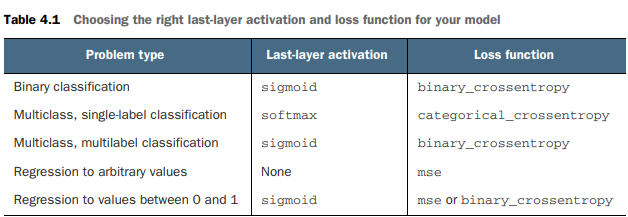

In [15]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(25, activation='softmax')
])

model.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=['accuracy'])

We will be running the model for 5 epoch for now and use the validation accuracy to decide if there is statistical power (where accuracy > 0.5)

In [16]:
history = model.fit(train_set_tensor, train_set_labels, epochs=5, validation_data=(test_set_tensor, test_set_labels))

Epoch 1/5
858/858 [==============================] - 3s 3ms/step - loss: 2.2386 - accuracy: 0.3742 - val_loss: 1.7832 - val_accuracy: 0.5238
Epoch 2/5
858/858 [==============================] - 2s 2ms/step - loss: 1.4773 - accuracy: 0.5972 - val_loss: 1.4973 - val_accuracy: 0.5541
Epoch 3/5
858/858 [==============================] - 2s 2ms/step - loss: 1.1881 - accuracy: 0.6790 - val_loss: 1.3649 - val_accuracy: 0.6011
Epoch 4/5
858/858 [==============================] - 2s 2ms/step - loss: 1.0153 - accuracy: 0.7315 - val_loss: 1.2846 - val_accuracy: 0.6149
Epoch 5/5
858/858 [==============================] - 2s 2ms/step - loss: 0.8959 - accuracy: 0.7660 - val_loss: 1.2718 - val_accuracy: 0.6174


In [17]:
loss, acc, = model.evaluate(test_set_tensor, test_set_labels)

225/225 [==============================] - 0s 2ms/step - loss: 1.2718 - accuracy: 0.6174


Now that we have achieved a validation accuracy above 0.5, we know that we have statistical power.

## Scaling up: developing a model that overfits

#### We will now begin to add more layers to the model 

For this model, we will be using convolution layers and max pooling to reduce the spatial dimensions of the inputs (downsample) coming from the convolution layers.

2D is typically used for RGB images while 1D is typically used for audio and 3D for multiple images from video.

The number of filters for the convolution layers are random and trial by error.

In [18]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(64, (3,3), padding = 'same', input_shape = train_set_tensor[0].shape, activation = 'relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(128, (3,3), padding = 'same', activation = 'relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(256, (3,3), padding = 'same', activation = 'relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dense(25, activation='softmax')
])

model.summary()
model.compile(optimizer='rmsprop',loss='categorical_crossentropy',metrics=['accuracy'])

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 28, 28, 64)        640       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 14, 14, 64)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 14, 14, 128)       73856     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 7, 7, 128)        0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 7, 7, 256)         295168    
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 3, 3, 256)       

In [19]:
history = model.fit(train_set_tensor, train_set_labels, epochs=8, validation_data=(test_set_tensor, test_set_labels))

Epoch 1/8
858/858 [==============================] - 111s 129ms/step - loss: 0.6092 - accuracy: 0.8101 - val_loss: 0.3285 - val_accuracy: 0.9165
Epoch 2/8
858/858 [==============================] - 111s 129ms/step - loss: 0.0213 - accuracy: 0.9949 - val_loss: 0.2325 - val_accuracy: 0.9451
Epoch 3/8
858/858 [==============================] - 109s 127ms/step - loss: 0.0136 - accuracy: 0.9963 - val_loss: 0.2398 - val_accuracy: 0.9530
Epoch 4/8
858/858 [==============================] - 109s 128ms/step - loss: 0.0067 - accuracy: 0.9987 - val_loss: 0.3040 - val_accuracy: 0.9551
Epoch 5/8
858/858 [==============================] - 111s 129ms/step - loss: 0.0100 - accuracy: 0.9984 - val_loss: 0.3081 - val_accuracy: 0.9488
Epoch 6/8
858/858 [==============================] - 109s 128ms/step - loss: 0.0086 - accuracy: 0.9985 - val_loss: 0.2718 - val_accuracy: 0.9607
Epoch 7/8
858/858 [==============================] - 111s 130ms/step - loss: 0.0052 - accuracy: 0.9992 - val_loss: 0.2804 - val_ac

In [20]:
loss, acc, = model.evaluate(test_set_tensor, test_set_labels)

225/225 [==============================] - 8s 35ms/step - loss: 0.3235 - accuracy: 0.9575


We can see that the model’s performance on the validation data begins to degrade at the last few epochs, meaning that overfitting is achieved. Now we can move on to regularizing and tuning the hyperparameters.

## Regularizing your model and tuning your hyperparameters

Batch normalization is added to speed up the learning process. It does so by standardizing the inputs to a layer for each mini-batch and reduces the number of training epochs required to train networks.

Dropout is added to prevent overfitting of the model.

Regularizer is added to reduce the error by fitting a function appropriately on the given training set and avoid overfitting.

In [21]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(32, (3,3), padding = 'same', input_shape = train_set_tensor[0].shape, activation = 'relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Conv2D(64, (3,3), padding = 'same', activation = 'relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Conv2D(128, (3,3), padding = 'same', activation = 'relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dropout(0.1),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(512, activation='relu', bias_regularizer=tf.keras.regularizers.l2(1e-4)),
    tf.keras.layers.Dense(25, activation='softmax')
])

model.summary()
model.compile(optimizer='rmsprop',loss='categorical_crossentropy',metrics=['accuracy'])

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 28, 28, 32)        320       
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 14, 14, 32)       0         
 2D)                                                             
                                                                 
 batch_normalization (BatchN  (None, 14, 14, 32)       128       
 ormalization)                                                   
                                                                 
 conv2d_4 (Conv2D)           (None, 14, 14, 64)        18496     
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 7, 7, 64)         0         
 2D)                                                             
                                                      

In [22]:
history = model.fit(train_set_tensor, train_set_labels, epochs=15, validation_data=(test_set_tensor, test_set_labels))

Epoch 1/15
858/858 [==============================] - 53s 60ms/step - loss: 0.1601 - accuracy: 0.9543 - val_loss: 0.7868 - val_accuracy: 0.8484
Epoch 2/15
858/858 [==============================] - 52s 61ms/step - loss: 0.0140 - accuracy: 0.9971 - val_loss: 0.2397 - val_accuracy: 0.9561
Epoch 3/15
858/858 [==============================] - 54s 62ms/step - loss: 0.0114 - accuracy: 0.9978 - val_loss: 0.4926 - val_accuracy: 0.9345
Epoch 4/15
858/858 [==============================] - 53s 62ms/step - loss: 0.0061 - accuracy: 0.9990 - val_loss: 0.3517 - val_accuracy: 0.9582
Epoch 5/15
858/858 [==============================] - 53s 62ms/step - loss: 0.0032 - accuracy: 0.9993 - val_loss: 0.5152 - val_accuracy: 0.9367
Epoch 6/15
858/858 [==============================] - 53s 61ms/step - loss: 0.0028 - accuracy: 0.9993 - val_loss: 0.4146 - val_accuracy: 0.9650
Epoch 7/15
858/858 [==============================] - 54s 63ms/step - loss: 0.0023 - accuracy: 0.9996 - val_loss: 0.7010 - val_accuracy:

In [23]:
loss, acc, = model.evaluate(test_set_tensor, test_set_labels)

225/225 [==============================] - 4s 17ms/step - loss: 0.4150 - accuracy: 0.9688


## Summary

In summary, we have looked at how the labels of the dataset is processed and converted to categorical format in which we can use to attempt to recognise what class(alphabet) each image pixel data represents. We have looked at how we can tackle a multiclass classification problem through the use of a multi-layered neural network, where we get the model to overfit, before fine tuning and attempt to find the right balance between underfitting and overfitting the model, and ultimately, achieving a model accuracy of 96.88%.